#Random Forest

##Exploratrory Data Analysis(EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('/content/glass.xlsx',sheet_name='glass')
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [4]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [5]:
df.isnull().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


In [6]:
df.dtypes

,0
RI,float64
Na,float64
Mg,float64
Al,float64
Si,float64
K,float64
Ca,float64
Ba,float64
Fe,float64
Type,int64


In [7]:
# Checking for outliers
from scipy import stats

numerical_columns = df.select_dtypes(include=['int64','float64'])

z_scores = stats.zscore(numerical_columns)
abs_z_scores = np.abs(z_scores)
outliers = (abs_z_scores > 3).all(axis=1)
print(f"Number of Outlier rows:{outliers.sum()}")

Number of Outlier rows:0


###Data Visualization

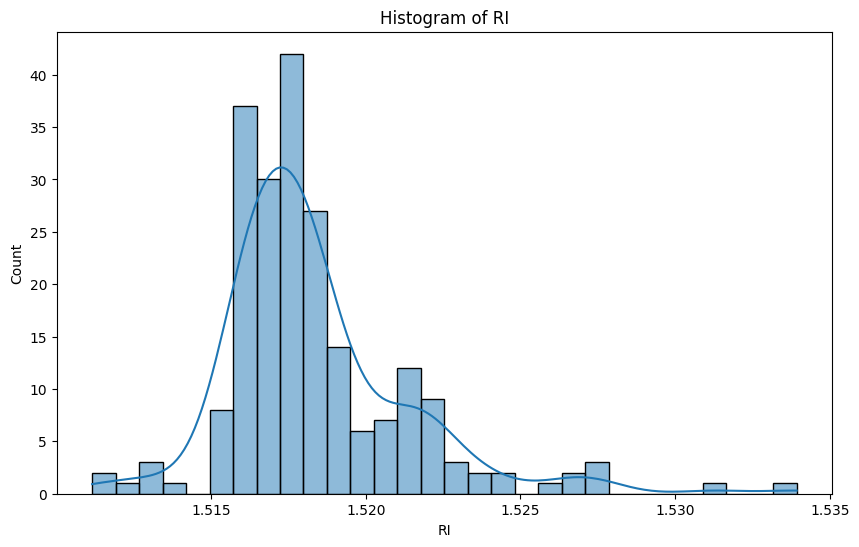

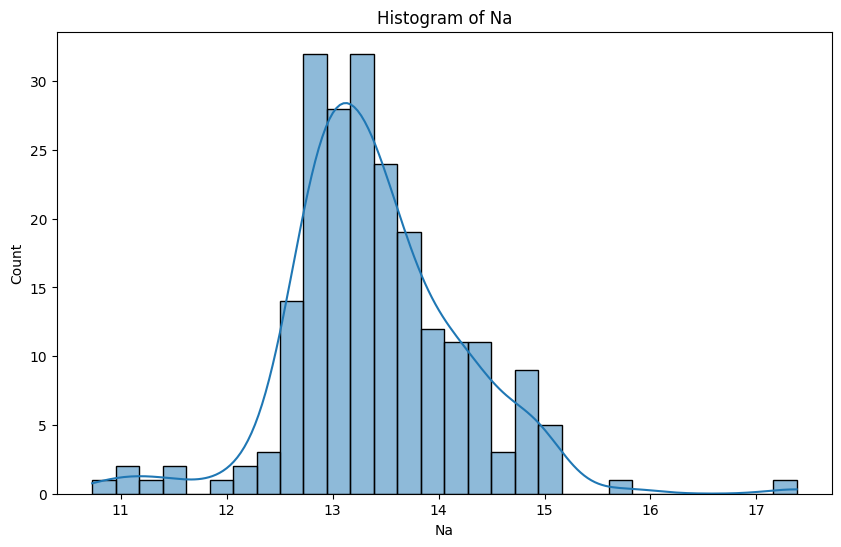

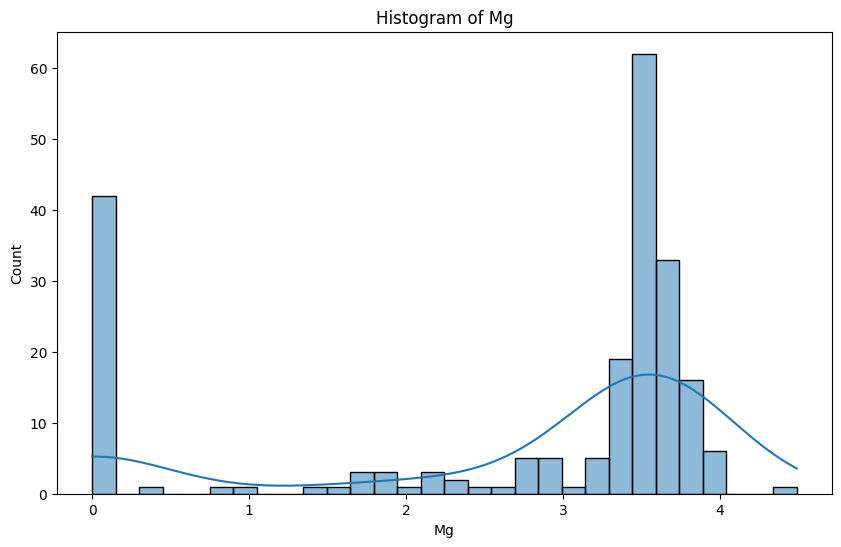

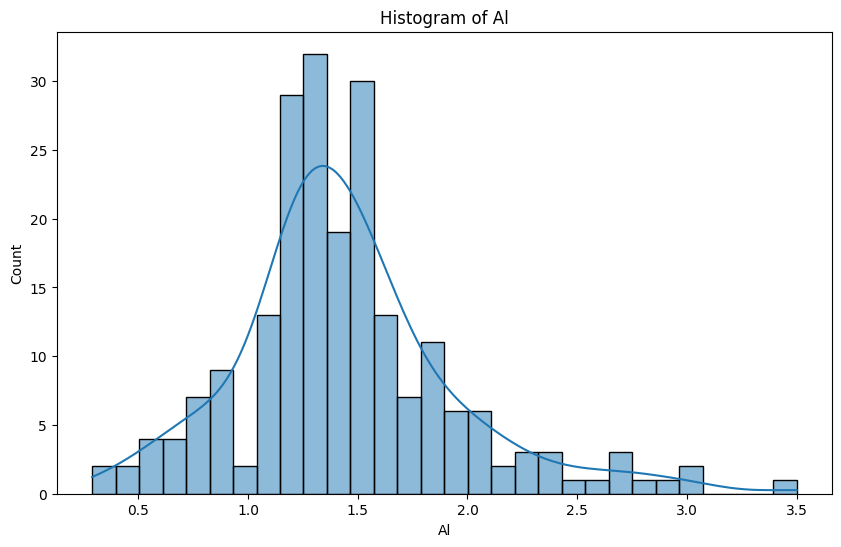

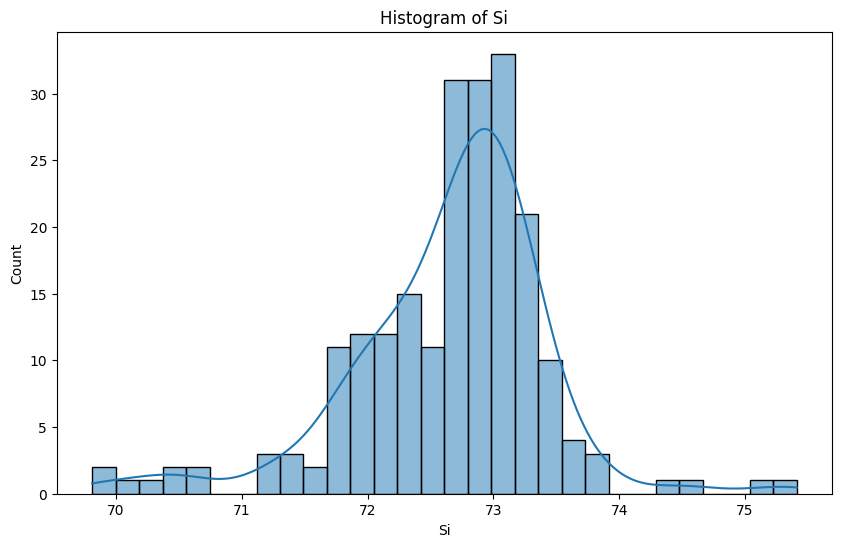

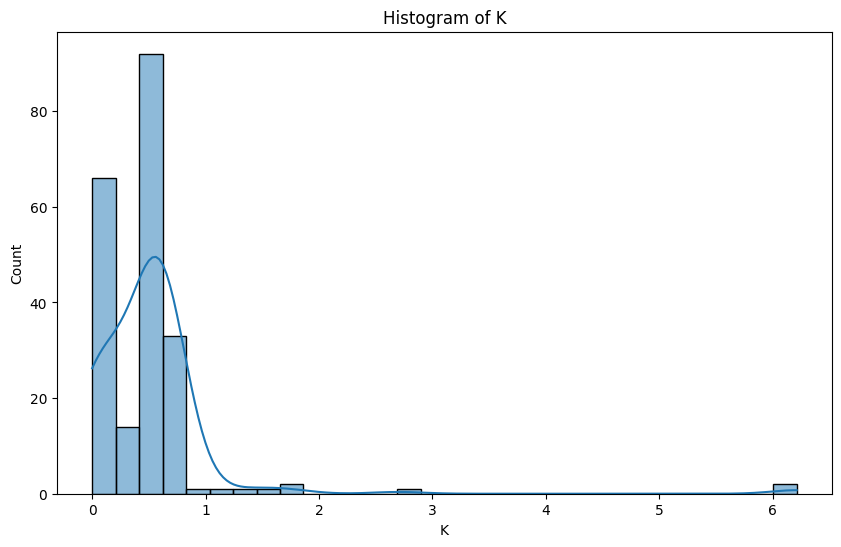

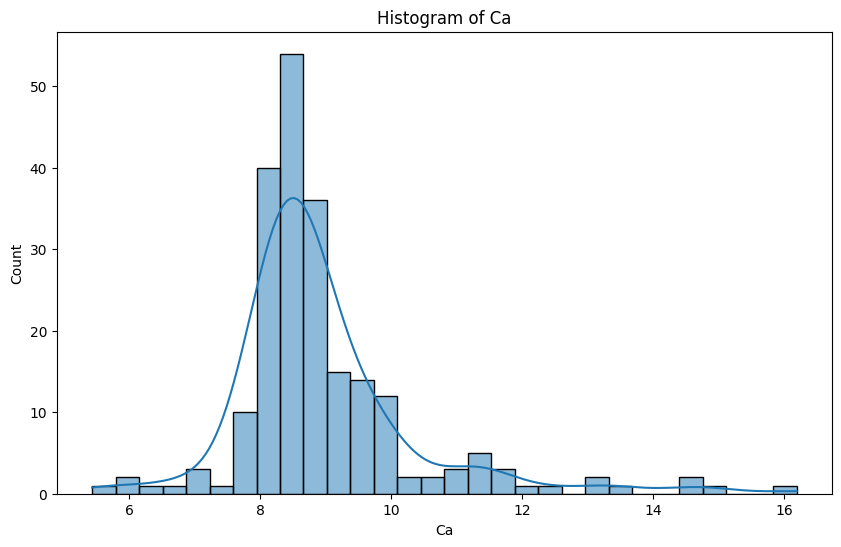

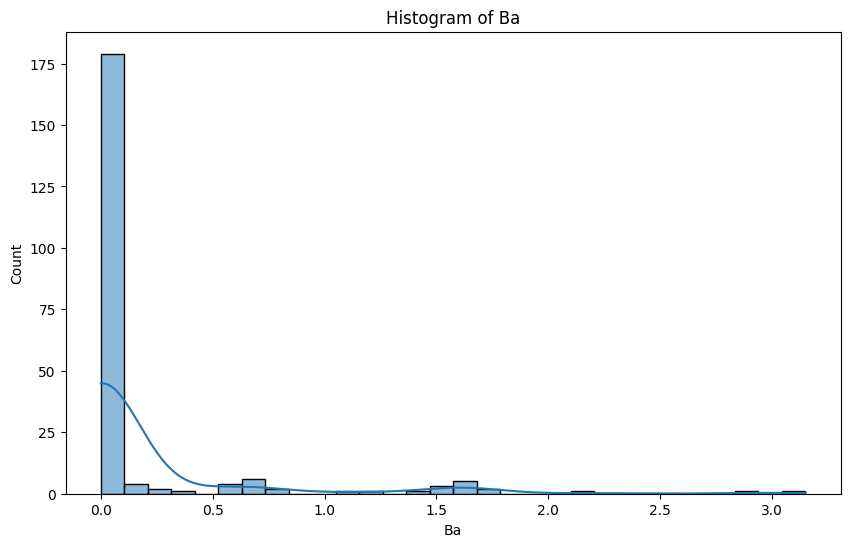

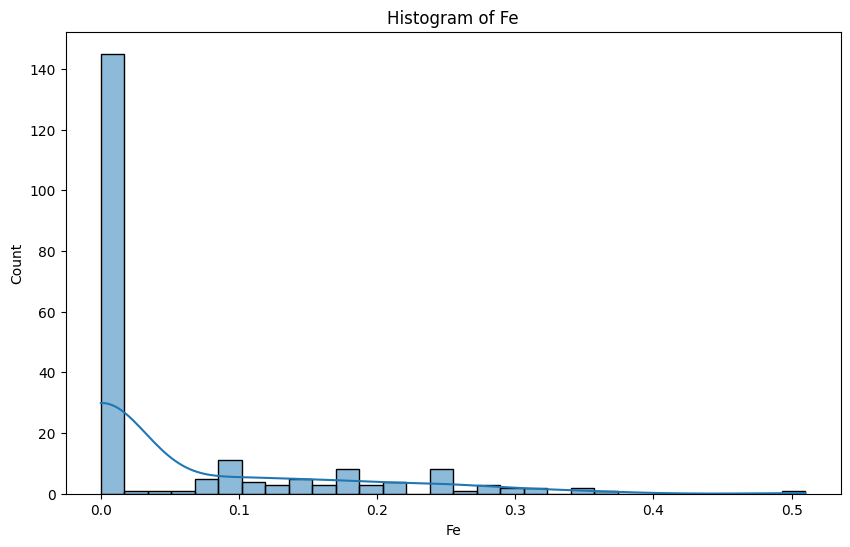

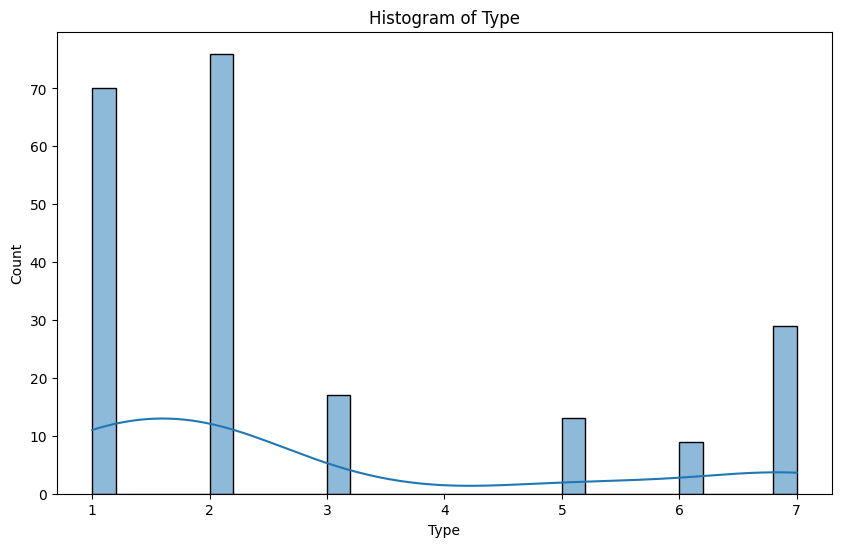

In [8]:
# Histograms for numerical features
for column in numerical_columns.columns:
  plt.figure(figsize=(10,6))
  sns.histplot(df[column],bins=30,kde=True)
  plt.title(f"Histogram of {column}")
  plt.show()

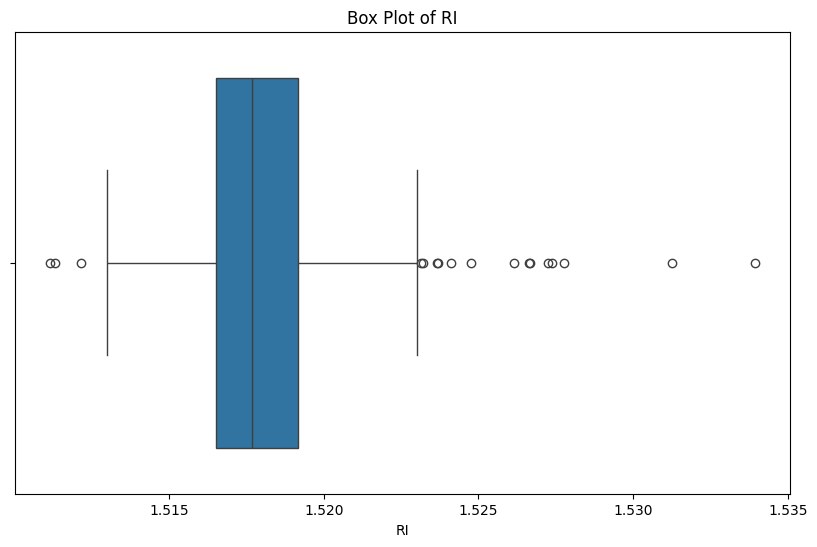

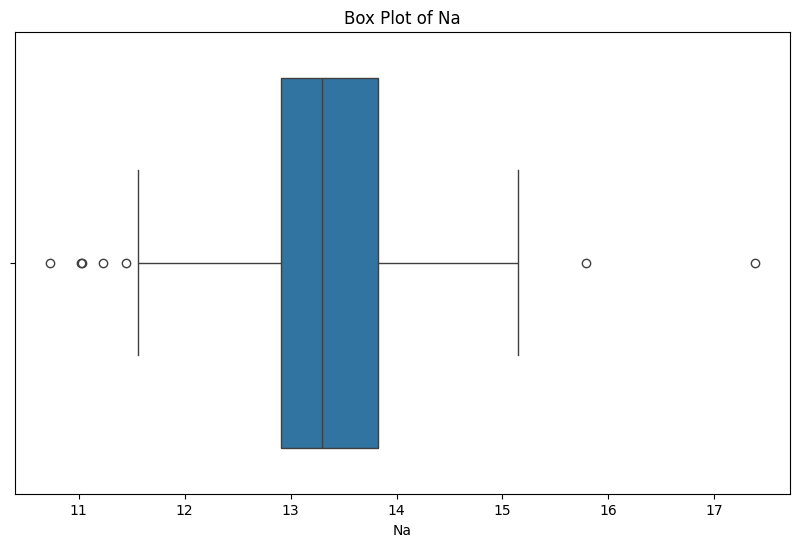

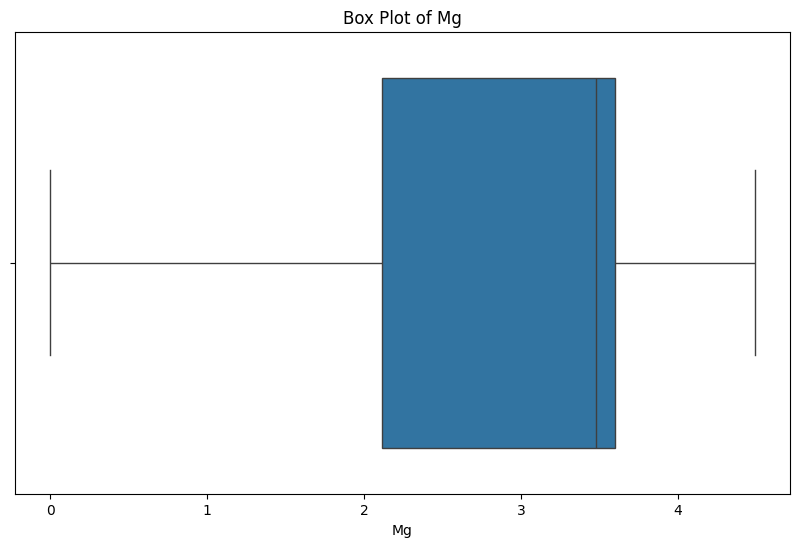

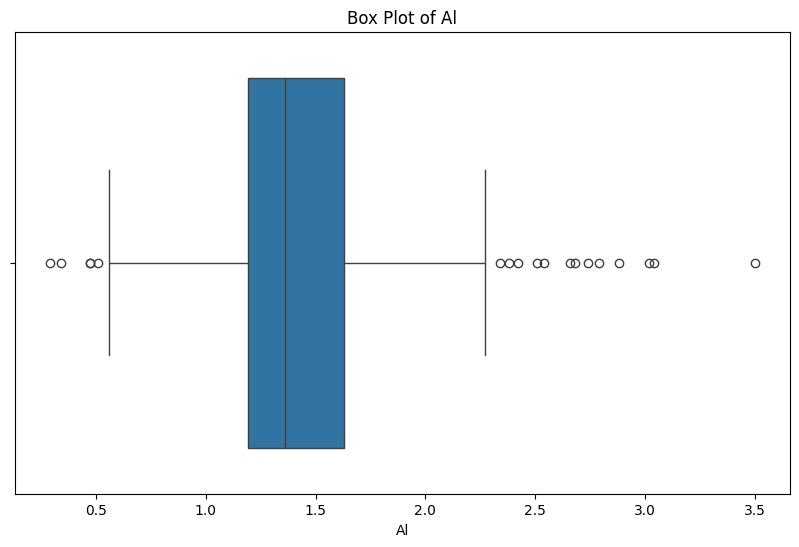

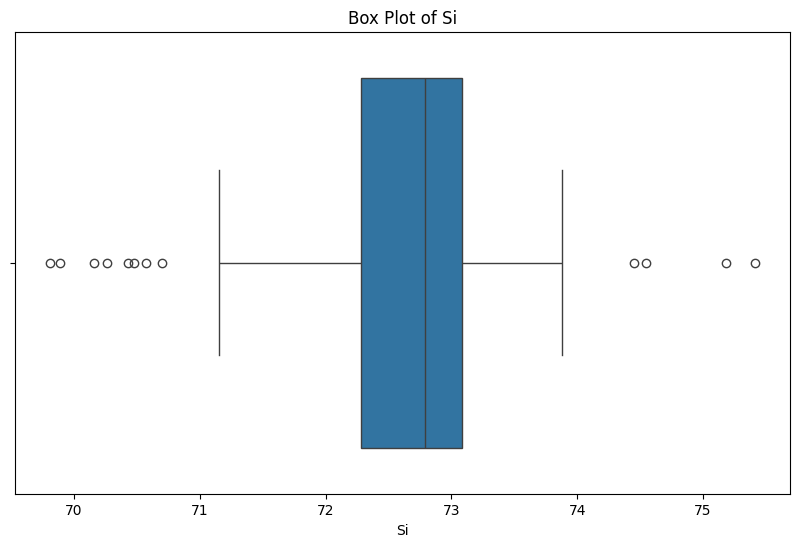

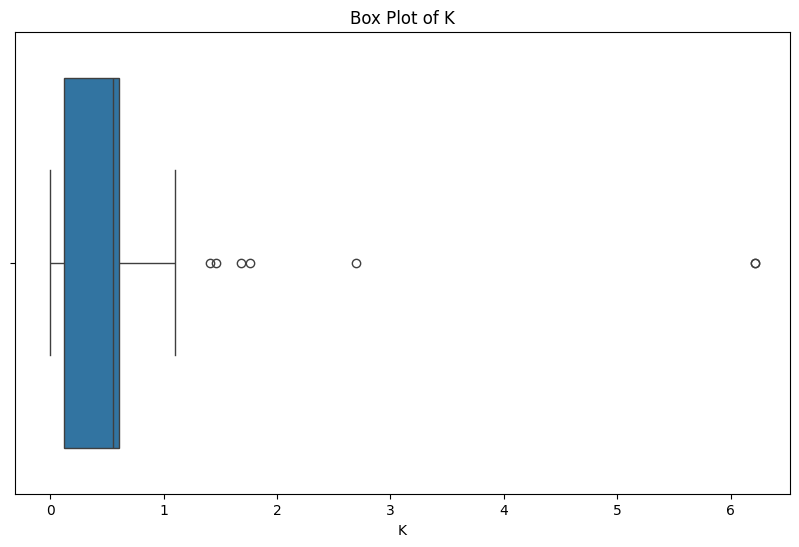

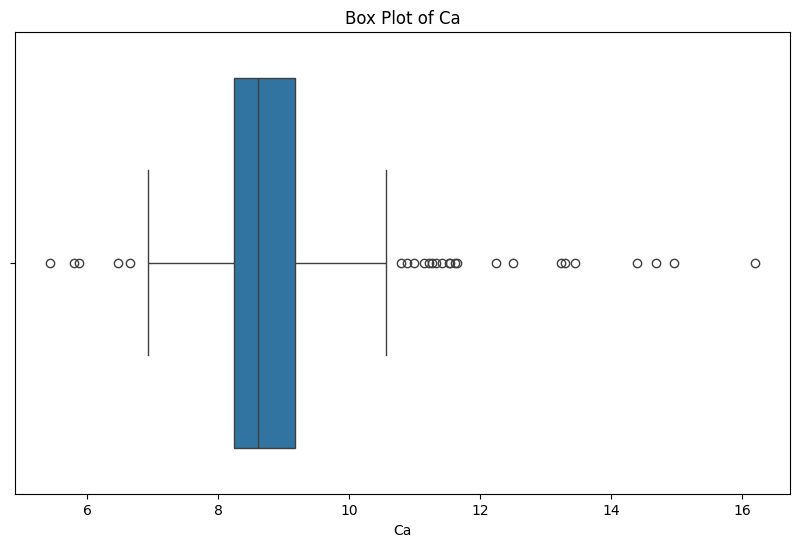

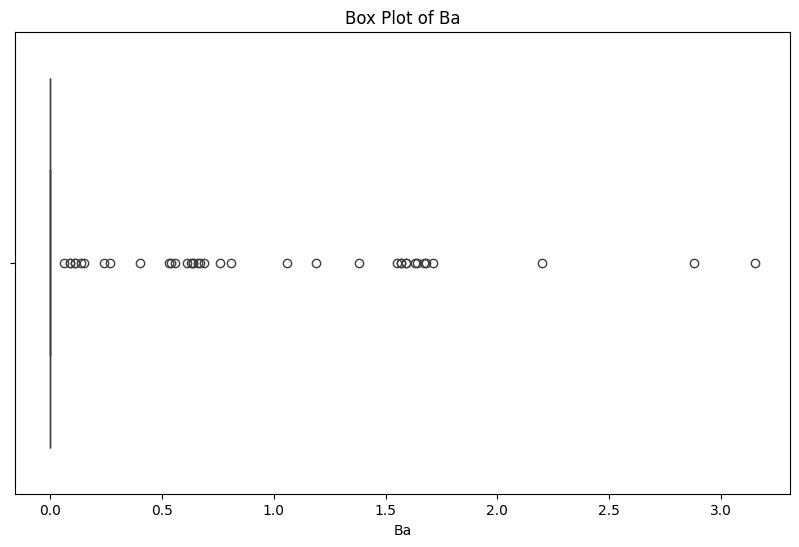

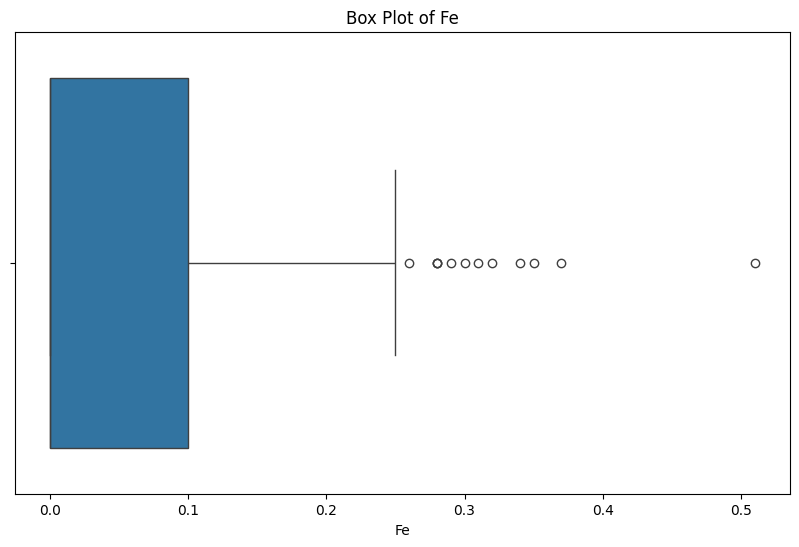

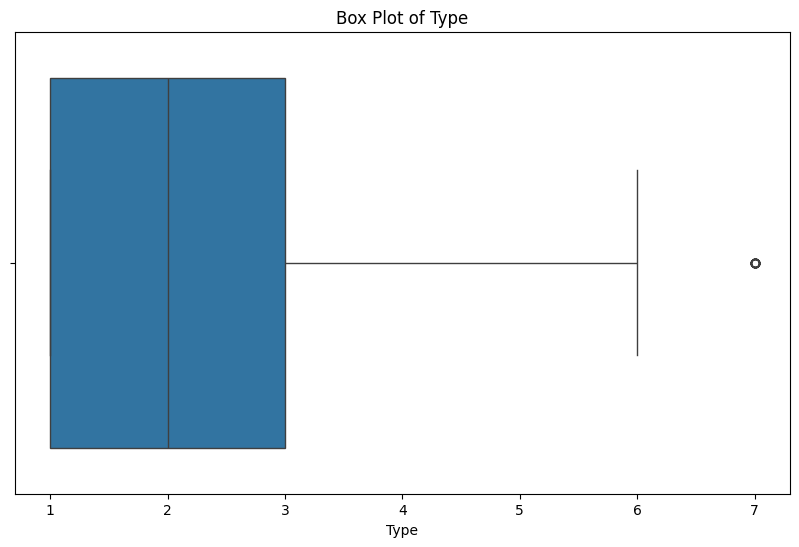

In [9]:
# Box plots for numerical features
for column in numerical_columns.columns:
  plt.figure(figsize=(10,6))
  sns.boxplot(x=df[column])
  plt.title(f"Box Plot of {column}")
  plt.show()

In [ ]:
#Pairplots
sns.pairplot(df)
plt.show()

In [ ]:
#Correlation matrix
plt.figure(figsize=(12,8))
correlation_matrix = numerical_columns.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('Type',axis='columns')
X

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

In [ ]:
y = df['Type']
y

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_standardized,y,test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(n_estimators=40)

In [ ]:
model.fit(X_train,y_train)

In [ ]:
model.predict(X_test)

In [ ]:
model.score(X_test,y_test)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
cl = classification_report(y_test,y_pred)
print(cl)

###Begging and Boosting methods

In [ ]:
# Bagging
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier

scores = cross_val_score(RandomForestClassifier(n_estimators=50),X, y, cv=10)
bag_model = BaggingClassifier(
    n_estimators=50,
    max_samples=0.8,
    oob_score=True,
    random_state=0
)
scores = cross_val_score(bag_model, X, y, cv=5)
scores
scores.mean()

In [ ]:
# AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier
scores1 = cross_val_score(RandomForestClassifier(n_estimators=50),X, y, cv=10)
ada_clf = AdaBoostClassifier(n_estimators=50,random_state=42)
scores1 = cross_val_score(ada_clf, X, y, cv=5)
scores1
scores.mean()

###Additional Notes


###1.Explain Bagging and Boosting methods.How is it different from each other.

Bagging is an ensemble method that aims to improve model accuracy by combining the predictions of multiple models trained on different random subsets of the training data.

Steps of Bagging Technique

-->Randomly select multiple bootstrap samples from the training data with replacement and train a separate model on each sample.

-->For classification, combine predictions using majority voting. For regression, average the predictions.

-->Assess the ensemble’s performance on test data and use the aggregated models for predictions on new data.

-->If needed, retrain the ensemble with new data or integrate new models into the existing ensemble.

*Boosting is an ensemble method that aims to enhance model performance by sequentially training models where each new model focuses on correcting errors made by previous models.

How is Boosting Model Trained to Make Predictions

-->Samples generated from the training set are assigned the same weight to start with. These samples are used to train a homogeneous weak learner or base model.

-->The prediction error for a sample is calculated – the greater the error, the weight of the sample increases. Hence, the sample becomes more important for training the next base model.

-->The individual learner is weighted too – does well on its predictions, gets a higher weight assigned to it. So, a model that outputs good predictions will have a higher say in the final decision.

-->The weighted data is then passed on to the following base model, and steps 2 and step 3 are repeated until the data is fitted well enough to reduce the error below a certain threshold.

-->When new data is fed into the boosting model, it is passed through all individual base models, and each model makes its own weighted prediction. Weight of these models is used to generate the final prediction. The predictions are scaled and aggregated to produce a final prediction.



*Key Difference Between Bagging and Boosting

-->The bagging technique combines multiple models trained on different subsets of data, whereas boosting trains models sequentially, focusing on the error made by the previous model.

-->Bagging is best for high variance and low bias models while boosting is effective when the model must be adaptive to errors, suitable for bias and variance errors.

-->Generally, boosting techniques are not prone to overfitting. Still, it can be if the number of models or iterations is high, whereas the Bagging technique is less prone to overfitting.

-->Bagging improves accuracy by reducing variance, whereas boosting achieves accuracy by reducing bias and variance.

-->Boosting is suitable for bias and variance, while bagging is suitable for high-variance and low-bias models.

###2.Explain how to handle imbalance in the data.


####*Random under-sampling

In data analysis, sometimes we have too much information from one group, which can skew the results. A technique called “under-sampling” can help fix this. It means we remove some examples from the larger group until it matches the size of the smaller group. This ensures a balanced view, helping to create a more reliable analysis.

####*Random over-sampling

In the world of data analysis, it’s crucial to have a balanced set of data to get accurate results. “Oversampling” is a handy technique to achieve this balance. It involves making copies of the smaller group of data until it’s as large as the bigger group. This way, the analysis is fair and gives us better results.

####*Synthetic over-sampling: SMOTE

While analyzing the data sometimes we need to add more examples to the smaller group to make the data balanced. “SMOTE”, which stands for Synthetic Minority Oversampling Technique, is a method that helps us do this. It picks two similar examples from the smaller group and makes a new example that is a mix of the two.

####*ADASYN: Adjusting the Data Balance Smartly

When we are dealing with data, sometimes the groups are not evenly matched, with one group having much more data than the other. “ADASYN”, which stands for Adaptive Synthetic Sampling, is a smart tool that helps to even things out. It creates new examples in the smaller group, and the number of new examples it makes depends on how imbalanced the data is to start with.

####*Hybrid Sampling: Mixing Two Methods for Better Data

When we work with data, it’s important to have a balanced mix to get the best results. “Hybrid sampling” helps us do just that. It’s a method where we add more examples to the smaller group and take away some from the bigger group. This way, we have a fair and even set of data to work with.

####*Tomek Links: A Method to Fine-Tune Your Data

Sometimes while analyzing the data necessary to remove some data points to get a clearer picture. “Tomek Links” is a technique that helps us do this. It finds pairs of data where one is from the larger group and the other is from the smaller group, and they are very similar. Then, it removes the data point from the larger group to make the data more balanced

####ENN Rule: Cleaning Up Data with the Help of Neighbors

When analyzing data, it’s crucial to have a clean and balanced dataset to get accurate results. The “Edited Nearest Neighbor” or ENN rule helps us achieve this. It works by spotting and removing data points from the larger group that are similar to points in the smaller group, helping to clear up any confusion and make the data more reliable.